# this notebook represents mid-term forecasting(1year) with monthly resolution using ML models

refs:


1.   https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
2.   (sklearn)https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1
3.   https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55
4.   https://stackoverflow.com/questions/63517126/any-way-to-predict-monthly-time-series-with-scikit-learn-in-python
5.   https://paperswithcode.com/paper/forecasting-foreign-exchange-rate-a
6. https://github.com/alan-turing-institute/sktime/blob/main/examples/01_forecasting.ipynb
7. https://arxiv.org/pdf/2005.08067.pdf (sktime paper-metrics p9)








fine tuning RF : 

*   https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
*   xgboost: https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
* to read: https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d 



Regarding a machine learning paper, consider starting by reviewing papers related to your work (Google Scholar may help) and write a section about it (keep in mind how your work relates to them and what innovation it brings to the field, and write about it). Then write sections for describing your dataset(s), for describing your algorithms and methodology, and why you have selected them. Also, don’t forget to write about your results (you will see how a machine learning paper is organized by reviewing other papers anyway).

At the end, get ready to answer the reviews you will receive some time after submitting.

It would be easier if you already have academic experience on researching or if you have a professor or experienced researcher to advise you with that. Also, at least talk to someone with academic experience to advise you WHERE you should submit your paper, given your work subject.

In summary: yes, you can! But it will be a lot easier if you have an advisor, at least…




One also needs to choose the journal which is most suited to the subject field of the article. Is the article a review article or a piece of original investigation? Does the study provide incremental gains in knowledge or is there something exceptionally novel to report? Journals and fields will vary in what they consider appropriate and which formats they publish.

Depending on the journal, choosing an appropriate editor(s) is the final step. There may be a list of editors and reviewers to choose from and it makes sense to choose someone who works in a closely related field.

The stages of publishing research may differ by field and publisher, but broadly you'll follow these steps:

Do the research
Decide what research results you want to publish together as an account of your research findings. This should be decided independently of the direction of the results, i.e. whether or not you got the results you wanted.
Discuss authorship with those who contributed to the research
Draft the text, tables and figures and work with all the authors on revising and editing the paper. Anyone involved in this process who is not an author should be acknowledged.
Optionally, get feedback from colleagues about the manuscript
Optionally, get the paper edited by a language editing service
Get approval from all the authors of the version to be submitted
Agree among the authors where you will submit and how any page charges or article processing charges will be paid
Have the underlying data and any code ready to share on request or ideally deposit this publicly. Also have documentation such as of ethics approval ready.
Prepare a cover letter and the manuscript files
Read the instructions for authors of the target journal, check you comply with their policies
Submit the article via the online submission
The article will undergo different initials checks / triage depending on the journal, such as scope or issues like reporting.
If the paper is not rejected, it will be assigned to an editor, either a staff editor or an academic editor. In some journals, the Editor-in-Chief decides this allocation.
The editor will decide if the paper is suitable for peer review. If not, they may reject the paper (often called a “desk reject”) or ask for revisions. Some journals discuss decisions or require approval by the EiC or a section editor, others give individual editors autonomy in their decisions.
Most journals require peer review before a paper can be accepted, though some rely on editorial review. Peer reviewers are experts in the topic and/or methods of the research. They may be selected from a database of reviewers, researchers the editors knows of themselves, or chosen based on their publication record.
Potential reviewers are asked to review, usually by email but occasionally by phone. If they agree, they will be sent the paper and given anything from a few days to several weeks to submit their review. The number of reviewers is usually two or three, but can vary. If reviewers decline, they may suggest alternatives. Publishing staff often support editors in this process.
Reviewers will usually send their comments via the online system or email. They might be asked to answer specific questions and are often asked about their recommendation (accept/revise/reject).
Once the editor has enough reviews, they will make their decision based on the reviews, the journal guidelines, and their own assessment of the paper and the reviewers' expertise. The editor may be able to overrule the reviewers. Their decision might need to be approved or discussed. They will send their decision, usually by email, to the authors.
If the article needs revisions, the authors will be asked to resubmit by a certain date. That deadline can often be extended. Authors might need to do more research, a reanalysis, or revise the language.
If the article is rejected, the authors might appeal the decision or be allowed to resubmit to the same journal if they address all the editor and reviewer concerns. Otherwise, go back to step 10 at the next journal of the authors' choice.
If revised, editor might make the next decision themselves or send the paper for re-review
Once accepted, the paper might be posted publicly as an “in press” version or this might wait until production is complete
During production, typesetting, formatting, copyediting and other checks will be performed by the publisher
The final article is then formally published, usually as HTML and/or PDF, and sent to indexing services

In [ ]:
#ref 1
#make zoom on pred vs test data
#make cross-correlation between pred-test data
#dont be overconfident with traditional accuracy metrics : r2, mae,...
#ref2
#A better alternative for cross validation on time series data (than K-fold CV) is 
#Forward Chaining strategy.

#sktime tuto github [6]
#1.2.1, 1.2.2, 1.3, 1.4.1, 3.3(tuning), 3.4 (ensembling)
#LSTM can overcome the problem of back-propagated error decay through memory blocks of LSTM. In 
#contrast, MLP) models very often face the problem ofoverfitting, backpropagated error decay, 
#and it cannot automatically determine the optimal time lags while fitting time-series data[5]

#ML mastery: xgboost, Random Forest

In [ ]:

from numpy import argsort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import sklearn
from sklearn import metrics
import numpy as np
import matplotlib.dates as mdates

In [ ]:
#read multivariate data
df=pd.read_csv('/content/clean_monthly_df_human_logic.csv')
df.time=pd.to_datetime(df.time,dayfirst=True)
df.columns

Index(['time', 'MIN_TEMPERATURE_C_t', 'max_clients_month_t_',
       'total_Holiday_Food_Related_t', 'MIN_TEMPERATURE_C_t_12',
       'max_clients_month_t_12', 'total_Holiday_Food_Related_t_12',
       'total_consommation_t_12', 'max_pdl_total_daily_load_t_12',
       'max_pdl_daily_load_t_12', 'max_pdl_daily_load_t', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [ ]:
data=pd.read_csv('/content/clean_monthly_df_human_logic.csv',index_col='time')[['MIN_TEMPERATURE_C_t',
      'max_clients_month_t_','total_Holiday_Food_Related_t',
      
       'MIN_TEMPERATURE_C_t_12','max_clients_month_t_12', 'total_Holiday_Food_Related_t_12',
       'total_consommation_t_12', 'max_pdl_total_daily_load_t_12',
       'max_pdl_daily_load_t_12', 'max_pdl_daily_load_t']].dropna()


In [ ]:
data.shape#without time

(55, 10)

In [ ]:
data.index=pd.to_datetime(data.index,dayfirst=True)

In [ ]:
data.head()

,MIN_TEMPERATURE_C_t,max_clients_month_t_,total_Holiday_Food_Related_t,MIN_TEMPERATURE_C_t_12,max_clients_month_t_12,total_Holiday_Food_Related_t_12,total_consommation_t_12,max_pdl_total_daily_load_t_12,max_pdl_daily_load_t_12,max_pdl_daily_load_t
time,,,,,,,,,,
2016-01-31,11,4268,1,8,3980,2,247497.63,22257,1479,1357
2016-02-29,13,4316,0,11,4023,0,263249.88,22242,1494,1294
2016-03-31,12,4346,0,12,4060,0,246311.89,21691,1551,1391
2016-04-30,16,4352,0,14,4094,0,237177.99,16752,1253,1134
2016-05-31,17,4356,0,19,4112,0,229106.03,12318,1123,1135


In [ ]:
data.tail()

,MIN_TEMPERATURE_C_t,max_clients_month_t_,total_Holiday_Food_Related_t,MIN_TEMPERATURE_C_t_12,max_clients_month_t_12,total_Holiday_Food_Related_t_12,total_consommation_t_12,max_pdl_total_daily_load_t_12,max_pdl_daily_load_t_12,max_pdl_daily_load_t
time,,,,,,,,,,
2020-03-31,9,5321,0,12,5217,0,259946.59,20736,1399,1463
2020-04-30,12,5324,7,13,5226,0,180855.14,18087,1381,1599
2020-05-31,18,5326,26,16,5221,27,166616.45,14871,1556,1400
2020-06-30,20,5324,0,20,5248,6,141878.54,11398,1337,1105
2020-07-31,23,5277,1,25,5292,0,241564.31,11077,999,1084


# data scaling made difference and improved the performance of some ML models (KNN, SVR, Ridge), but scaling is not required for decision tree based models (decision tree, random forest, xgboost,..) https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
# split into train and test sets

n_train_days = -12

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  rmse=np.sqrt(metrics.mean_squared_error(y_true, y_pred))
  print(f'RMSE is : {rmse}')
  mape=mean_absolute_percentage_error(y_true, y_pred)
  print(f'MAPE is : {mape} %')
  r2=metrics.r2_score(y_true, y_pred)
  print(f'R2 is : {r2}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  #model_scores[model_name] = [rmse, mape, r2]
  return

In [ ]:
!pip install xgboost

LR: -0.615138 (2.036942)
Ridge R: 0.603959 (0.160101)
lasso: -0.311682 (0.152913)
elastic net: -0.311682 (0.152913)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


NN: -0.450466 (0.770457)
KNN: 0.538744 (0.056740)
RF: 0.532718 (0.223886)
SVR: 0.610851 (0.150533)
Xgboost: 0.500935 (0.171450)


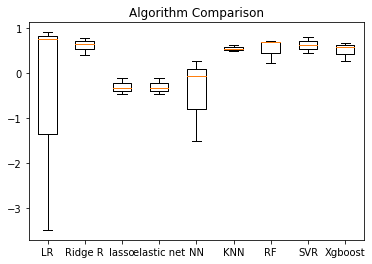

In [ ]:
# ML models to test
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge R',Ridge()))
models.append(('lasso',linear_model.Lasso()))
models.append(('elastic net',ElasticNet()))
#models.append(('GP',GaussianProcessRegressor())) (very poor)
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 1000))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('Xgboost',XGBRegressor(objective='reg:squarederror', n_estimators=1000)))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
  tscv = TimeSeriesSplit(n_splits=3)
    #n_splits=3 : because in train data there are 3 steps of prediction
    #1-2016 features -->predict 2017; 2-16,17-->predict 18; 3-16,17,18-->predict 19
  cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


# performance ranking according to the plot 
1-SVR,2-ridge, 3-KNN, 4-RF,5-Xgboost

# Ridge

In [ ]:
model = Ridge()
param_search = { 
    'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'solver': ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']

}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [ ]:
best_model

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='saga', tol=0.001)

In [ ]:
best_score

0.6153288055389807

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
#overall performance
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 6851.3418091743615
MAE is : 67.7718231252015
RMSE is : 82.77283255497761
MAPE is : 5.175072098259333 %
R2 is : 0.840682190352162

SMAPE is : 0.4248869147586846

MASE is : 0.5656221960373417


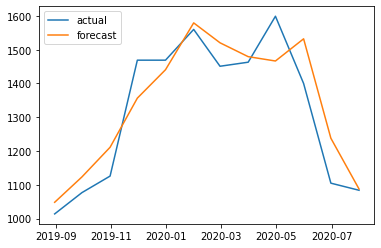

In [ ]:
# plot real vs predictions
time=data.index[-12:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

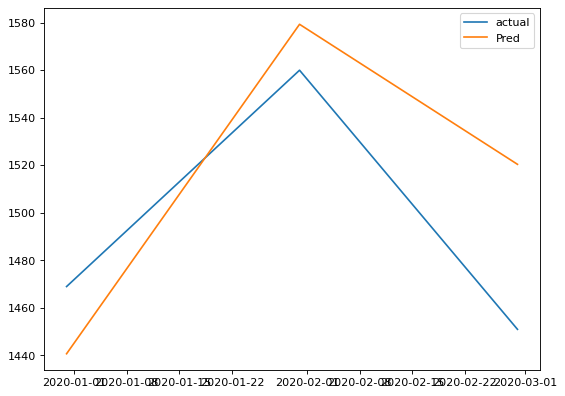

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[4:7],inv_y[4:7],label='actual')
plt.plot(time[4:7],inv_yhat[4:7],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4:7], inv_yhat[4:7])

Evaluation metric results:-
MSE is : 1997.043283970843
MAE is : 39.00283106418245
RMSE is : 44.68829023324615
MAPE is : 2.649024360648082 %
R2 is : 0.12265012419517785

SMAPE is : 0.8647630192695533

MASE is : 0.39002831064182447


# **same methodology is repeated**

# SVR

In [ ]:
X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]

In [ ]:

model = SVR()
param_search = { 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3],
    'gamma' : ['scale','auto'],
    'C' : [0.1,0.2,0.3,0.4,0.5,1,1.5,2,2.5,3],
    'epsilon':[0.05,0.1,0.15],
    'shrinking':[True,False]
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


SVR(C=0.2, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 7787.544372035099
MAE is : 74.04425902730989
RMSE is : 88.24706438196739
MAPE is : 5.365127609878346 %
R2 is : 0.8189121858981527

SMAPE is : 0.46244307560818104

MASE is : 0.6179718128227685


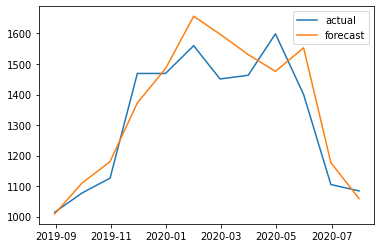

In [ ]:
# plot real vs predictions
time=data.index[-12:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

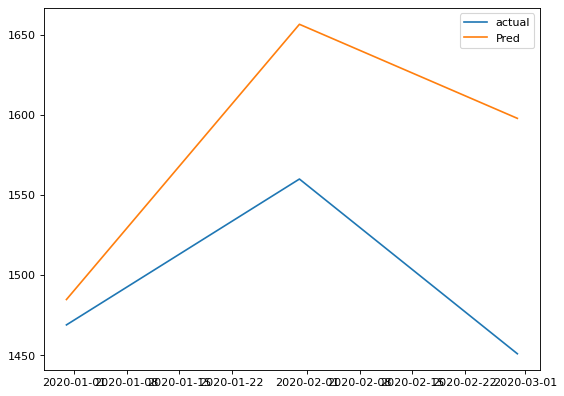

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[4:7],inv_y[4:7],label='actual')
plt.plot(time[4:7],inv_yhat[4:7],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4:7], inv_yhat[4:7])

Evaluation metric results:-
MSE is : 10379.928513976245
MAE is : 86.4134310271608
RMSE is : 101.88193418843325
MAPE is : 5.796018485317577 %
R2 is : -3.5601560395287617

SMAPE is : 1.8746323618879783

MASE is : 0.8641343102716078


# KNN

In [ ]:
X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]

In [ ]:

model = KNeighborsRegressor()
param_search = { 
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[1,2,3,4,5,10,15,20,30],
    'p':[1,2]
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                    weights='distance')

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 6136.7688839788925
MAE is : 55.88854568562842
RMSE is : 78.33753177104121
MAPE is : 4.073914952100742 %
R2 is : 0.857298525728007

SMAPE is : 0.35815564980071407

MASE is : 0.46644461497868933


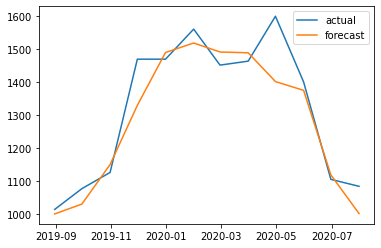

In [ ]:
# plot real vs predictions
time=data.index[-12:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

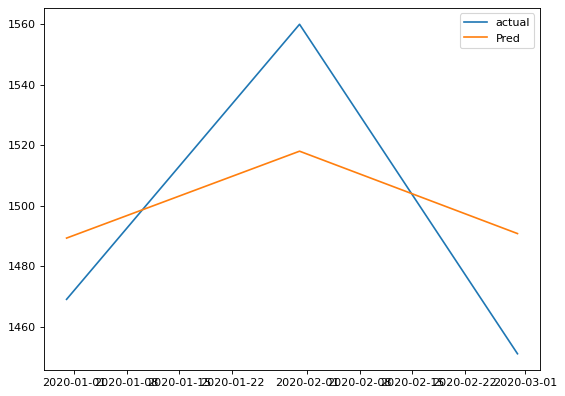

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[4:7],inv_y[4:7],label='actual')
plt.plot(time[4:7],inv_yhat[4:7],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4:7], inv_yhat[4:7])

Evaluation metric results:-
MSE is : 1251.5131122339833
MAE is : 34.004656652025005
RMSE is : 35.3767312259624
MAPE is : 2.27043657294387 %
R2 is : 0.45017973200693895

SMAPE is : 0.7575069555172943

MASE is : 0.34004656652025006


# random forest and Xgboost do not require data scaling https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6

# Random forest

In [ ]:
#train data: all the data except the last 12 months
#test data: the last months

X_train,y_train=data[:-12].drop(['max_pdl_daily_load_t'], axis = 1),data[:-12].max_pdl_daily_load_t
X_test,y_test=data[-12:].drop(['max_pdl_daily_load_t'], axis = 1),data[-12:].max_pdl_daily_load_t

In [ ]:
#fine tuning, grid search
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20,40,60,80,100],#[10,20,30],#[10,50,100],#,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,30,40,50],#[60,62,65,67,69],#[11,12,13],#[10,12,14,16,18,20],
    #'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,3,4,5],#[5],#[4,5,6],[1, 2, 3,4],
    'bootstrap' : [True, False]
    #default_criterion for evaluation: mse
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
timeseries_evaluation_metrics_func(y_true, y_pred)


Evaluation metric results:-
MSE is : 10437.761077182271
MAE is : 75.78793620731129
RMSE is : 102.1653614351864
MAPE is : 5.8609624295990255 %
R2 is : 0.7572853203415737

SMAPE is : 0.48365362088740976

MASE is : 0.6325245055238422


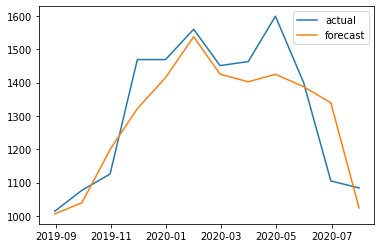

In [ ]:
# plot real vs predictions
time=data.index[-12:]
plt.plot(time,y_true,label='actual')
plt.plot(time,y_pred,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

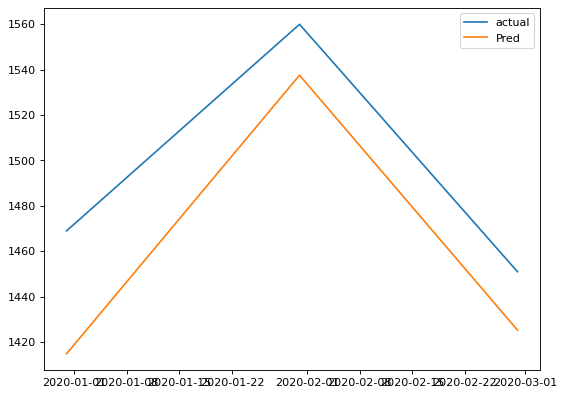

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[4:7],y_true[4:7],label='actual')
plt.plot(time[4:7],y_pred[4:7],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(y_true[4:7], y_pred[4:7])

Evaluation metric results:-
MSE is : 1364.9802754641562
MAE is : 34.09097222222241
RMSE is : 36.94563946481582
MAPE is : 2.2982677943293424 %
R2 is : 0.40033083670909864

SMAPE is : 0.769745373762257

MASE is : 0.3409097222222241


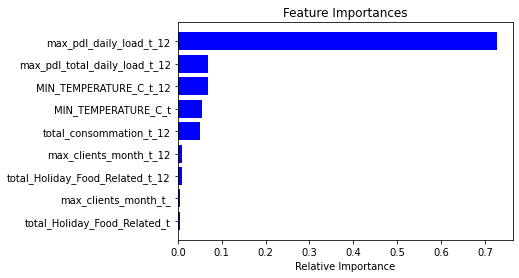

In [ ]:
imp = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# xgboost

In [ ]:
#train data: all the data except the last 12 months
#test data: the last 12 months

X_train,y_train=data[:-12].drop(['max_pdl_daily_load_t'], axis = 1),data[:-12].max_pdl_daily_load_t
X_test,y_test=data[-12:].drop(['max_pdl_daily_load_t'], axis = 1),data[-12:].max_pdl_daily_load_t

In [ ]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()
param_search = { 
    'n_estimators': [200,400,600,800],#[10,20,30],#[10,50,100],#,
    'max_depth' : [1,2,3,45,10,20,30,40,50],#[60,62,65,67,69],#[11,12,13],#[10,12,14,16,18,20],
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'learning_rate':[0.001,0.01,0.1]
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
timeseries_evaluation_metrics_func(y_true, y_pred)


Evaluation metric results:-
MSE is : 7858.893728063752
MAE is : 73.8793233235677
RMSE is : 88.65040173661794
MAPE is : 5.400332072190986 %
R2 is : 0.8172530622638527

SMAPE is : 0.46258711980151324

MASE is : 0.6165952629432813


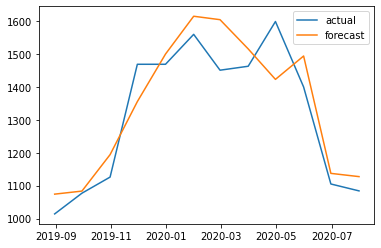

In [ ]:
# plot baseline and predictions
time=data.index[-12:]
plt.plot(time,y_true,label='actual')
plt.plot(time,y_pred,label='forecast')


plt.legend()

#locator = mdates.MonthLocator()
#fmt = mdates.DateFormatter('%b')
#X = plt.gca().xaxis
#X.set_major_locator(locator)
# Specify formatter
#X.set_major_formatter(fmt)
plt.show()

ZOOM on winter 2020

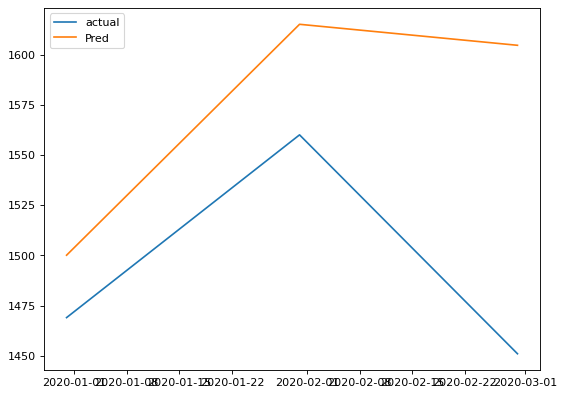

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[4:7],y_true[4:7],label='actual')
plt.plot(time[4:7],y_pred[4:7],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(y_true[4:7], y_pred[4:7])

Evaluation metric results:-
MSE is : 9196.412190030018
MAE is : 79.90869140625
RMSE is : 95.89792589013601
MAPE is : 5.410029697984029 %
R2 is : -3.040208420885979

SMAPE is : 1.7371971896029725

MASE is : 0.7990869140625


# ensembling



*   KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=4, p=1,weights='distance')
*   RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',max_depth=40, max_features='auto', max_leaf_nodes=None,max_samples=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=3,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=20, n_jobs=None, oob_score=False,random_state=None, verbose=0, warm_start=False)



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
# split into train and test sets

n_train_days = -12

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
# get a list of base models
def get_models():
  models = list()
  models.append(('knn', KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
                                            metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                                            weights='distance')))
  models.append(('rf', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                             max_depth=40, max_features='auto', max_leaf_nodes=None,
                                             max_samples=None, min_impurity_decrease=0.0,
                                             min_impurity_split=None, min_samples_leaf=3,
                                             min_samples_split=2, min_weight_fraction_leaf=0.0,
                                             n_estimators=20, n_jobs=None, oob_score=False,
                                             random_state=None, verbose=0, warm_start=False)))
  return models


In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
  scores = list()
  for name, model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    yhat=yhat.reshape(yhat.shape[0],1)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
    inv_yhat = concatenate((X_test,yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]
    y_test = y_test.reshape((len(y_test), 1))
    inv_y = concatenate((X_test,y_test), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    mae = mean_absolute_error(inv_y, inv_yhat)
    scores.append(-mae)
  return scores


In [ ]:
# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print(scores)
ranking = 1 + argsort(argsort(scores))
print(ranking)

[-61.98056919804103, -91.71839556277062]
[2 1]


In [ ]:
# create the ensemble
weighted_ensemble = VotingRegressor(estimators=models, weights=ranking)
#verbose --> time consumed while fitting will be printed
# fit the ensemble on the training dataset
weighted_ensemble.fit(X_train, y_train)
# make predictions on test set
weighted_yhat = weighted_ensemble.predict(X_test)
yhat=weighted_yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
weighted_inv_yhat = inv_yhat[:,-1]

y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# evaluate predictions using MAE (Mean absolute error)
score = mean_absolute_error(inv_y, weighted_inv_yhat)
print('Weighted Avg MAE: %.3f' % (score))
# evaluate each standalone model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
for i in range(len(models)):
	print('>%s: %.3f' % (models[i][0], -scores[i]))



Weighted Avg MAE: 67.550
>knn: 61.981
>rf: 78.512


In [ ]:
# evaluate equal weighting (simple average ensemble)
average_ensemble = VotingRegressor(estimators=models)
average_ensemble.fit(X_train, y_train)
average_yhat = average_ensemble.predict(X_test)

yhat=average_yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
simple_inv_yhat = inv_yhat[:,-1]

y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
score = mean_absolute_error(inv_y, simple_inv_yhat)
print('Voting MAE: %.3f' % (score))

Voting MAE: 67.812


# **weighted ensembling**




In [ ]:
#general model performance 
timeseries_evaluation_metrics_func(inv_y, weighted_inv_yhat)

Evaluation metric results:-
MSE is : 7183.119873827942
MAE is : 67.5498516342176
RMSE is : 84.75328827737566
MAPE is : 5.0898633794112245 %
R2 is : 0.8329671826905931

SMAPE is : 0.4323823598757551

MASE is : 0.5637696266892211


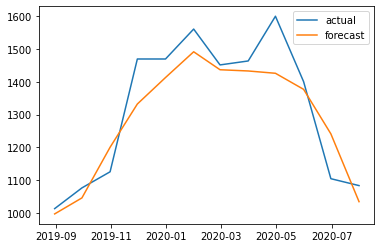

In [ ]:
# plot baseline and predictions
time=data.index[-12:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,weighted_inv_yhat,label='forecast')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4:7], weighted_inv_yhat[4:7])

Evaluation metric results:-
MSE is : 2721.2110111302186
MAE is : 46.70344450181741
RMSE is : 52.16522798886456
MAPE is : 3.091984297152553 %
R2 is : -0.1954944401138321

SMAPE is : 1.0590482708471254

MASE is : 0.46703444501817404


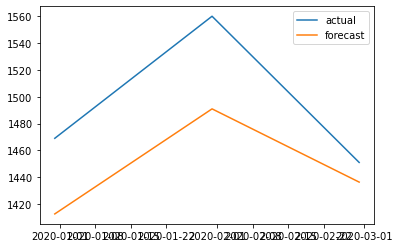

In [ ]:
# plot baseline and predictions
time=data.index[-12:][4:7]
plt.plot(time,inv_y[4:7],label='actual')
plt.plot(time,weighted_inv_yhat[4:7],label='forecast')
plt.legend()
plt.show()

# **simple average ensembling**

In [ ]:
timeseries_evaluation_metrics_func(inv_y, simple_inv_yhat)

Evaluation metric results:-
MSE is : 8139.641890159364
MAE is : 67.81185289864298
RMSE is : 90.21996392240115
MAPE is : 5.173168308196602 %
R2 is : 0.8107246794311884

SMAPE is : 0.43307696067745105

MASE is : 0.5659562836760794


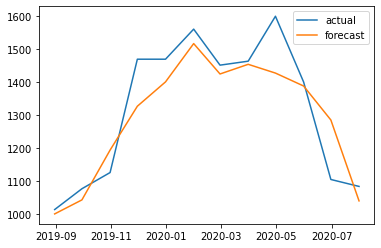

In [ ]:
# plot baseline and predictions
time=data.index[-12:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,simple_inv_yhat,label='forecast')
plt.legend()
plt.show()

In [ ]:
timeseries_evaluation_metrics_func(inv_y[4:7], simple_inv_yhat[4:7])

Evaluation metric results:-
MSE is : 2447.8407543562594
MAE is : 46.379634993727144
RMSE is : 49.475658200333825
MAPE is : 3.106846743320967 %
R2 is : -0.07539621152037146

SMAPE is : 1.051589736968377

MASE is : 0.4637963499372714


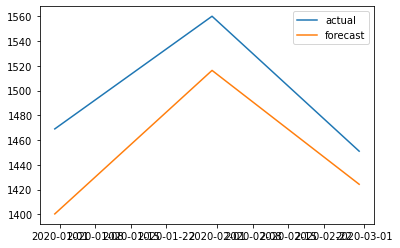

In [ ]:
# plot baseline and predictions
time=data.index[-12:][4:7]
plt.plot(time,inv_y[4:7],label='actual')
plt.plot(time,simple_inv_yhat[4:7],label='forecast')
plt.legend()
plt.show()